In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

![](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
feature_names = iris.feature_names
target_names = iris.target_names
classes = np.unique(y)

print(feature_names)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


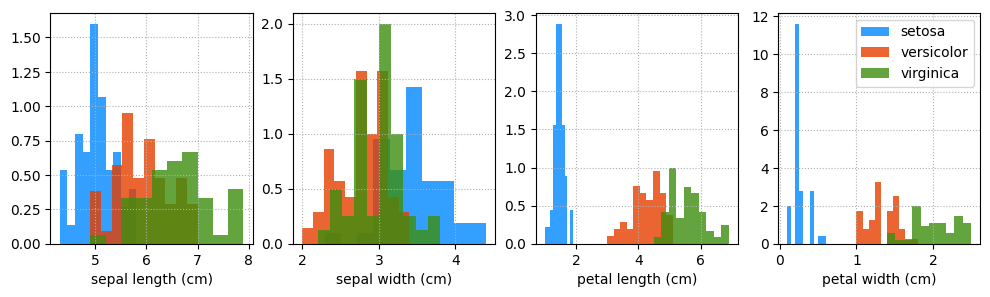

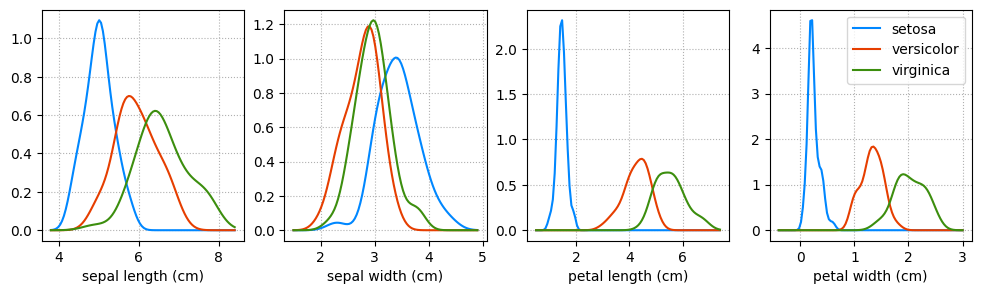

In [4]:
from utils import plot_hist, plot_kde

plot_hist(iris)
plot_kde(iris)

In [5]:

print(X.shape)
print(classes)

(150, 4)
[0 1 2]


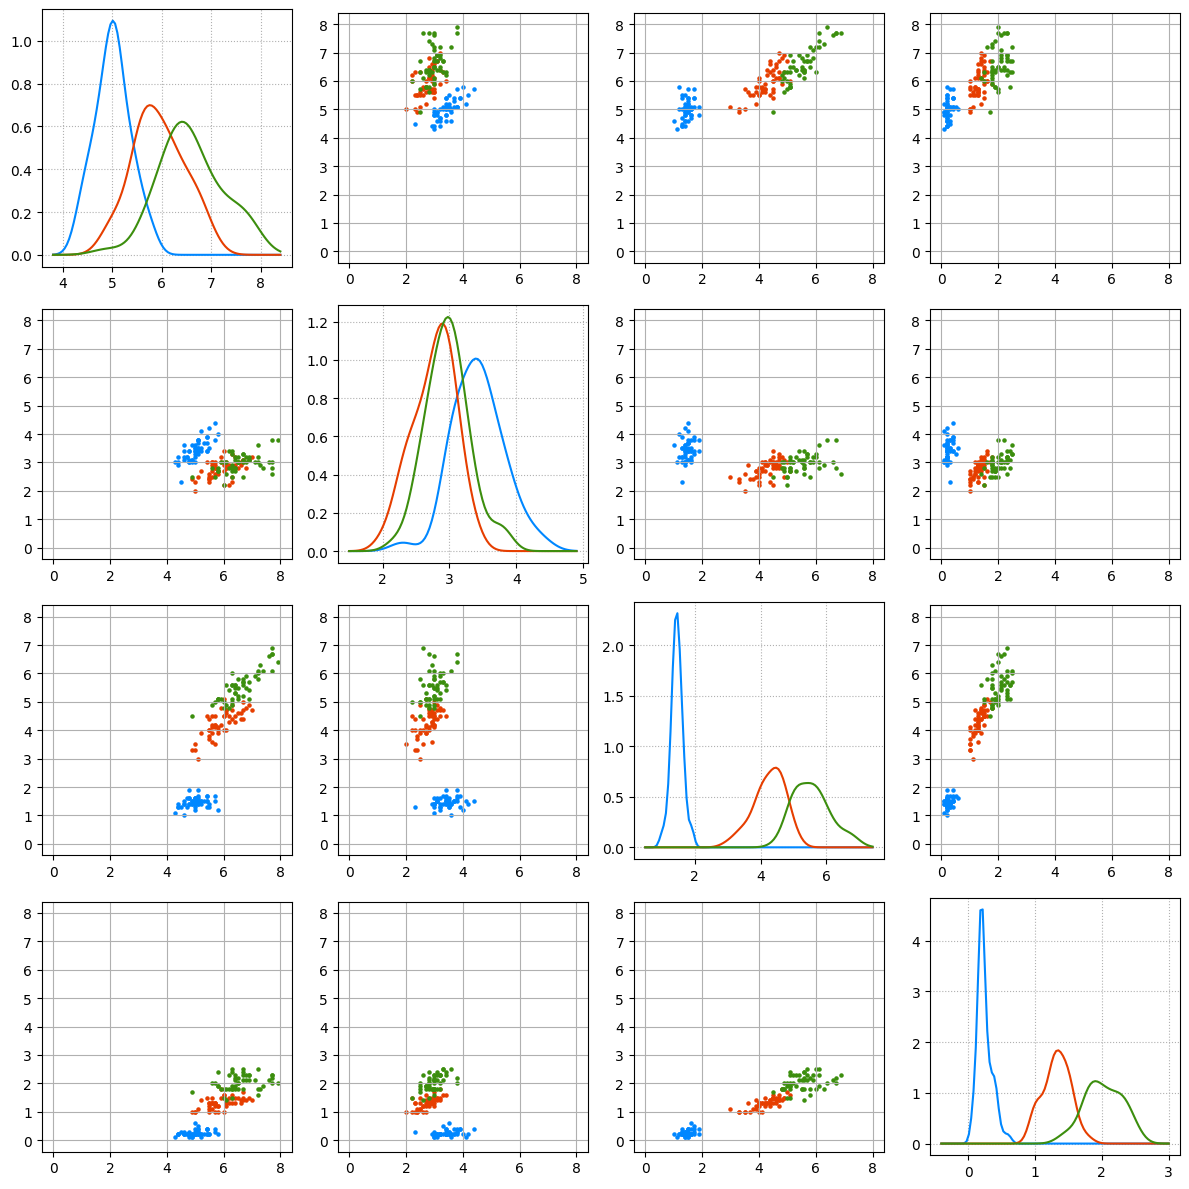

In [6]:
from utils import plot_scatter

plot_scatter(iris)

In [7]:
selected_features = (0, 1)
x = X[:, selected_features]
print(x.shape)

(150, 2)


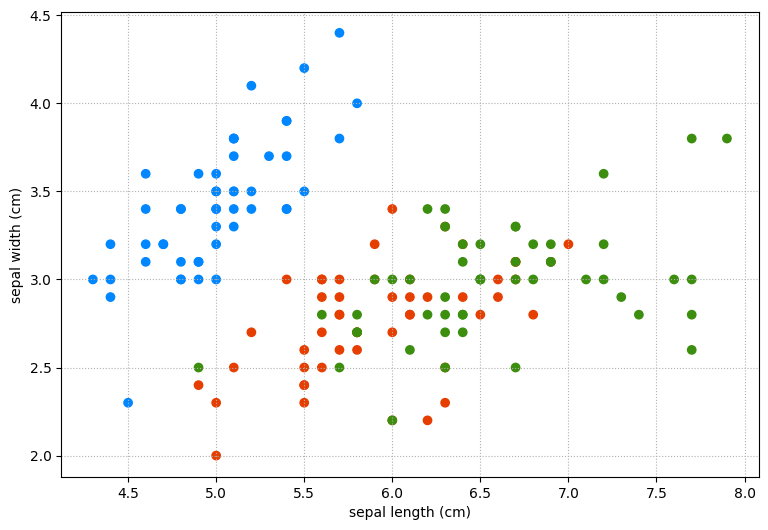

In [8]:

fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

ax.scatter(*x.T, c=colors[y])
ax.set_xlabel(feature_names[selected_features[0]])
ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect(True)
ax.grid(True, ls=':')

# Algorytm Najblizszych Centroidów

In [9]:
y == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [10]:
from scipy.spatial.distance import cdist

centroids = np.array([
    np.mean(x[y == l], axis=0) for l in classes
])

def nearest_centroid(X, centroids):
    dist_mat = cdist(X, centroids)
    return np.argmin(dist_mat, axis=1)


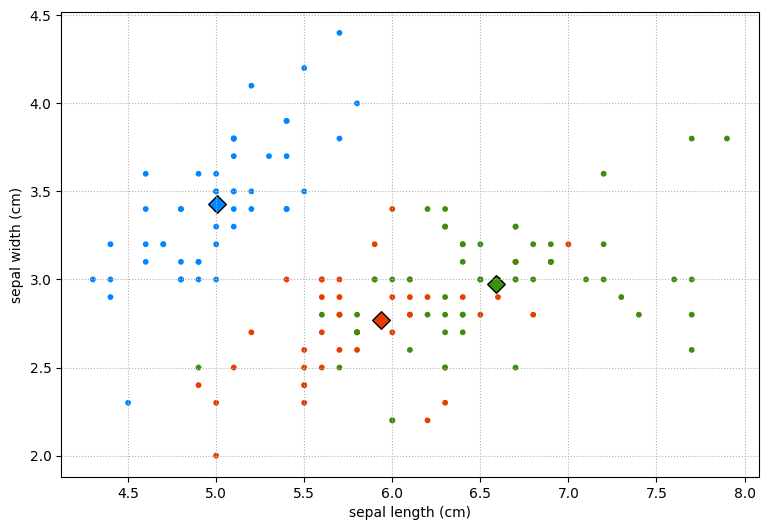

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

ax.scatter(*x.T, c=colors[y], s=10)

for c, center in zip(colors, centroids):
    ax.scatter(*center, marker="D", s=80, facecolor=c, edgecolors='k')

ax.set_xlabel(feature_names[selected_features[0]])
ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect('equal')
ax.grid(True, ls=':')

In [12]:
P = 1000
# xmin, ymin = (0, 0)
# xmax, ymax = (10, 10)
xmin, ymin = np.min(x, axis=0)
xmax, ymax = np.max(x, axis=0)

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax, P),
    np.linspace(ymin, ymax, P)
)

print(xx, yy)


[[4.3        4.3036036  4.30720721 ... 7.89279279 7.8963964  7.9       ]
 [4.3        4.3036036  4.30720721 ... 7.89279279 7.8963964  7.9       ]
 [4.3        4.3036036  4.30720721 ... 7.89279279 7.8963964  7.9       ]
 ...
 [4.3        4.3036036  4.30720721 ... 7.89279279 7.8963964  7.9       ]
 [4.3        4.3036036  4.30720721 ... 7.89279279 7.8963964  7.9       ]
 [4.3        4.3036036  4.30720721 ... 7.89279279 7.8963964  7.9       ]] [[2.        2.        2.        ... 2.        2.        2.       ]
 [2.0024024 2.0024024 2.0024024 ... 2.0024024 2.0024024 2.0024024]
 [2.0048048 2.0048048 2.0048048 ... 2.0048048 2.0048048 2.0048048]
 ...
 [4.3951952 4.3951952 4.3951952 ... 4.3951952 4.3951952 4.3951952]
 [4.3975976 4.3975976 4.3975976 ... 4.3975976 4.3975976 4.3975976]
 [4.4       4.4       4.4       ... 4.4       4.4       4.4      ]]


In [15]:

space = np.c_[xx.ravel(), yy.ravel()]
space.shape


(1000000, 2)

In [16]:

Z = nearest_centroid(space, centroids)

print(space.shape)
print(Z.shape)

(1000000, 2)
(1000000,)


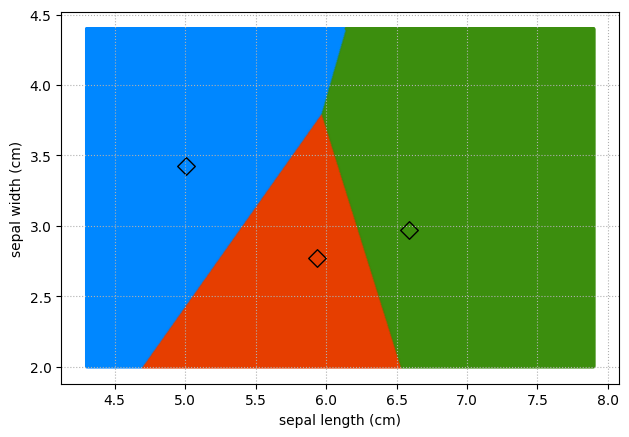

In [17]:

fig, ax = plt.subplots(1, 1, figsize=(1.2 * BW, 1.2 * BW))

# Plot space
ax.scatter(*space.T, c=colors[Z], edgecolors='none', s=5, alpha=0.7)

for c, center in zip(colors, centroids):
    ax.scatter(*center, marker="D", s=80, facecolor=c, edgecolors='k')

# Plot misses
y_pred = nearest_centroid(x, centroids)
x_miss = y_pred != y
# ax.scatter(*x[x_miss].T, edgecolors='k', facecolor=colors[y[x_miss]])

ax.set_xlabel(feature_names[selected_features[0]])
ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect('equal')
ax.grid(True, ls=':')

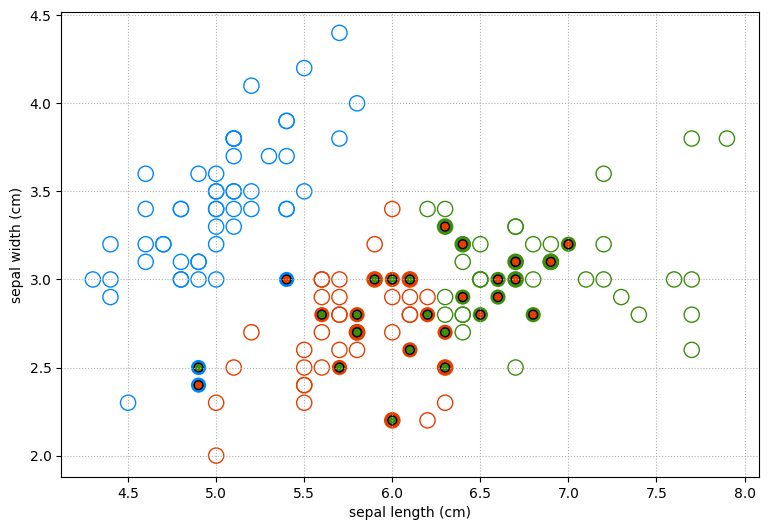

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

y_pred = nearest_centroid(x, centroids)

correct_map = (y == y_pred)
incorrect_map = (y != y_pred)

ax.scatter(*x[correct_map].T, c='none', edgecolors=colors[y[correct_map]], s=120)

ax.scatter(*x[incorrect_map].T, c=colors[y_pred[incorrect_map]], edgecolors='none', s=120)
ax.scatter(*x[incorrect_map].T, c=colors[y[incorrect_map]], edgecolors='k', s=40)

# for c, center in zip(colors, centroids):
#     ax.scatter(*center, marker="D", s=20, facecolor='w')
#     ax.scatter(*center, marker="D", s=30, facecolor=c, edgecolors='gray')

ax.set_xlabel(feature_names[selected_features[0]])
ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect('equal')
ax.grid(True, ls=':')

In [19]:
total_samples = len(x)
x_correct = np.sum(y_pred == y)
accuracy = x_correct / total_samples

print("Example Accuracy:", accuracy)


Example Accuracy: 0.8133333333333334


In [20]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

clf = NearestCentroid()

clf.fit(x, y)
y_pred = clf.predict(x)

accuracy = accuracy_score(y, y_pred)

print("Iris Accuracy:", accuracy)


Iris Accuracy: 0.8133333333333334


## To nie jest prawidłowy sposób weryfikacji klasyfikatora!

In [21]:
from sklearn.decomposition import PCA

x = PCA(n_components=2).fit_transform(X)

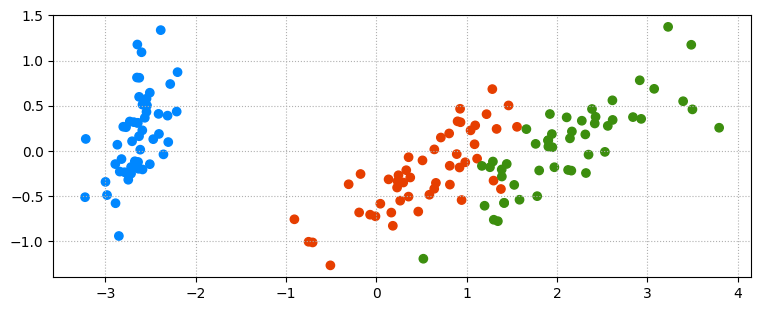

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

ax.scatter(*x.T, c=colors[y])
# ax.set_xlabel(feature_names[selected_features[0]])
# ax.set_ylabel(feature_names[selected_features[1]])
ax.set_aspect(True)
ax.grid(True, ls=':')

In [23]:
clf = NearestCentroid()
clf.fit(x, y)
y_pred = clf.predict(x)

accuracy = accuracy_score(y, y_pred)

print("Iris Accuracy:", accuracy)

Iris Accuracy: 0.9266666666666666


0


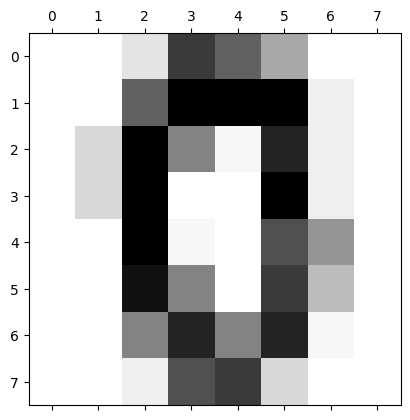

In [27]:
from sklearn.datasets import load_digits

digits = load_digits()
selected_idx = 20

img = digits.images[selected_idx]
label = digits.target[selected_idx]

print(digits.target[selected_idx])
# print(digits.images[selected_idx])
plt.matshow(digits.images[selected_idx], cmap='Greys')

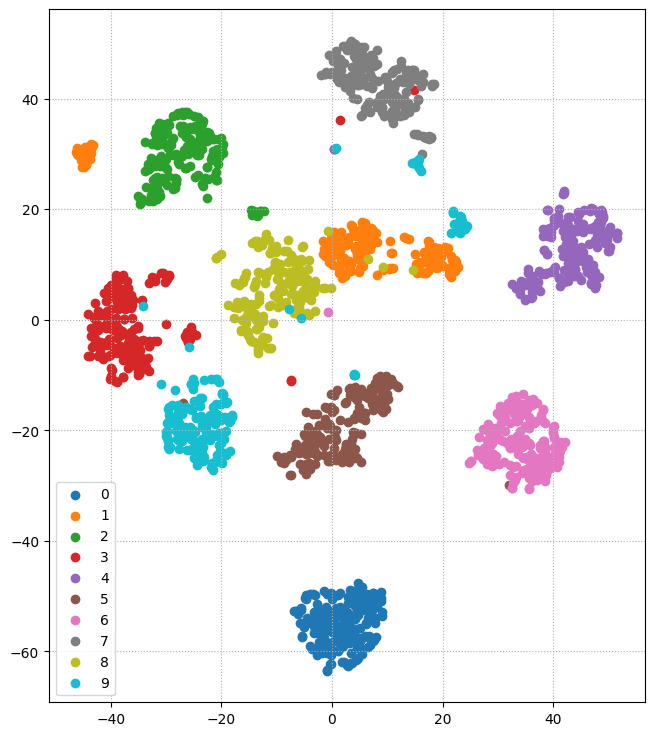

In [51]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X, y = digits.data, digits.target

X = X / 254
# x = PCA(n_components=2).fit_transform(X)
x = TSNE(n_components=2).fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

for i in range(10):
    ax.scatter(*x[y == i].T, label=i)

ax.set_aspect(True)
ax.grid(True, ls=':')
ax.legend()

(1797, 64)


/Users/swojciechowski/miniconda3/envs/moo/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


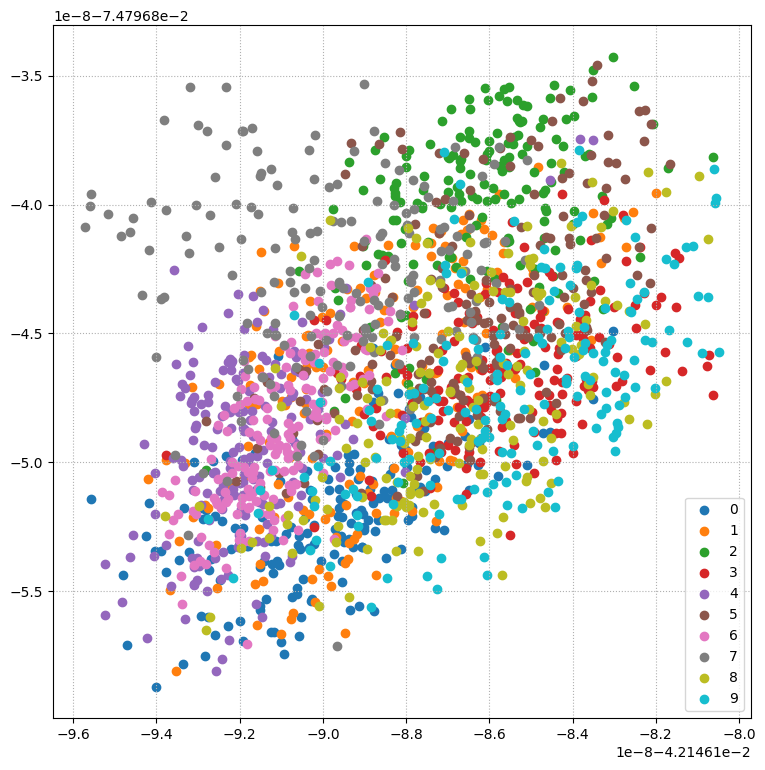

In [53]:
from sklearn.neural_network import MLPRegressor
X, y = digits.data, digits.target

print(X.shape)

# Normalize
X = X / 254

mlp = MLPRegressor(hidden_layer_sizes=(100, 2, 100), activation='relu', tol=1e-3, max_iter=100, n_iter_no_change=100)
mlp.fit(X, X)

x_ = X
x_ = x_ @ mlp.coefs_[0] + mlp.intercepts_[0]
x_ = x_ @ mlp.coefs_[1] + mlp.intercepts_[1]

fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

for i in range(10):
    ax.scatter(*x_[y == i].T, label=i)

# ax.set_aspect('equal')
ax.grid(True, ls=':')
ax.legend()

In [41]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups()

print(*news.target_names, sep='\n')
print('--' * 20)
print(news.data[100])

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc
----------------------------------------
From: tchen@magnus.acs.ohio-state.edu (Tsung-Kun Chen)
Subject: ** Software forsale (lots) **
Nntp-Posting-Host: magnusug.magnus.acs.ohio-state.edu
Organization: The Ohio State University
    ****   This is a post for my friend,  You can either call    ****
    ****    him  J.K Lee  (614)791-0748    or Drop me a mail     ****
Distribution: usa
Lines: 39

1.  Software publishing SuperBase 4 windows v.1.3           --->$80

2.  OCR System ReadRight v.3.1 for Windows                  --->$65

3.  OCR System ReadRight  v.2.01 for DOS                    --->$65

4.  Unregistered Zortech 32 bit C++ Compiler v.3.1          --

In [49]:

from sklearn.feature_extraction.text import TfidfVectorizer

X, y = news.data, news.target

vectorizer = TfidfVectorizer(use_idf=False)
vectorizer.fit(X)
x = vectorizer.transform(X)

x.shape

# tokens = vectorizer.get_feature_names_out()


(1187, 25638)

In [47]:

print(len(tokens))
print(tokens[37780])
print(x[0])

130107
car
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 89 stored elements and shape (1, 130107)>
  Coords	Values
  (0, 4605)	0.06401843996644799
  (0, 16574)	0.06401843996644799
  (0, 18299)	0.06401843996644799
  (0, 26073)	0.06401843996644799
  (0, 27436)	0.06401843996644799
  (0, 28615)	0.12803687993289598
  (0, 32311)	0.06401843996644799
  (0, 34181)	0.06401843996644799
  (0, 34995)	0.06401843996644799
  (0, 35187)	0.06401843996644799
  (0, 35612)	0.06401843996644799
  (0, 35983)	0.06401843996644799
  (0, 37433)	0.06401843996644799
  (0, 37565)	0.06401843996644799
  (0, 37780)	0.32009219983223997
  (0, 40998)	0.06401843996644799
  (0, 42876)	0.06401843996644799
  (0, 45295)	0.06401843996644799
  (0, 48618)	0.06401843996644799
  (0, 48620)	0.06401843996644799
  (0, 50111)	0.06401843996644799
  (0, 50527)	0.12803687993289598
  (0, 51730)	0.06401843996644799
  (0, 51793)	0.06401843996644799
  (0, 56979)	0.19205531989934396
  :	:
  (0, 104813)	0.06401843996644799
  (0,

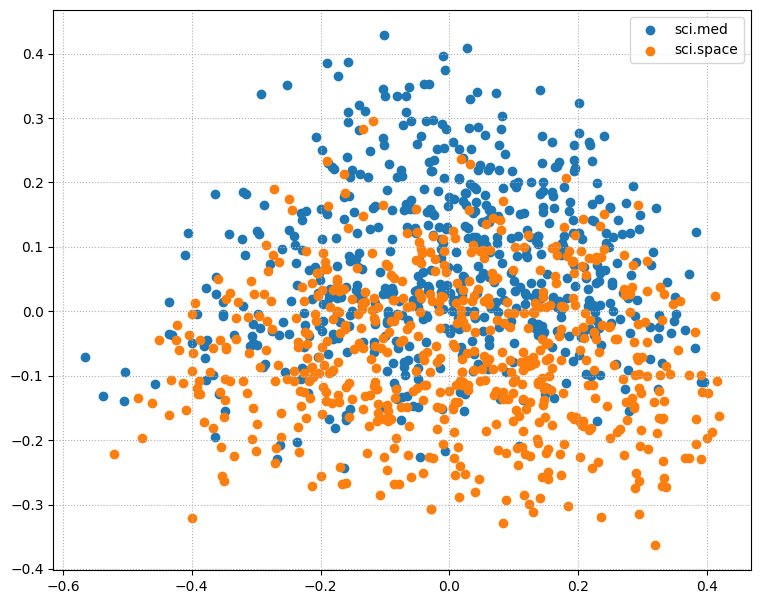

In [48]:
news = fetch_20newsgroups(categories=["sci.med", "sci.space"])

X, y = news.data, news.target

# vectorizer = TfidfVectorizer()
x = vectorizer.transform(X)

x = PCA(n_components=2).fit_transform(x)

fig, ax = plt.subplots(1, 1, figsize=(1.5 * BW, 1.5 * BW))

for l in np.unique(y):
    ax.scatter(*x[y == l].T, label=news.target_names[l])

ax.set_aspect(True)
ax.grid(True, ls=':')
ax.legend()
